In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


In [3]:
# Load the dataset
file_path = "C:/Users/HP/Downloads/Employee.csv"
df = pd.read_csv(file_path)

In [5]:
# Display basic information
display(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


None

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [7]:
# Step 1: Data Exploration
unique_values = {col: df[col].nunique() for col in df.columns}
print("Unique values per column:", unique_values)

Unique values per column: {'Company': 6, 'Age': 29, 'Salary': 40, 'Place': 11, 'Country': 1, 'Gender': 2}


In [9]:
# Step 2: Data Cleaning
# Find missing values
display(df.isnull().sum())

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [11]:
# Replace 0 in 'Age' with NaN
df['Age'] = df['Age'].replace(0, np.nan)


In [13]:
# Fill missing values
for col in ['Company', 'Place']:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode
for col in ['Age', 'Salary']:
    df[col].fillna(df[col].median(), inplace=True)  # Fill numerical with median

C:\Users\HP\AppData\Local\Temp\ipykernel_7664\892562790.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode
C:\Users\HP\AppData\Local\Temp\ipykernel_7664\892562790.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [15]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [17]:
# Find and treat outliers using IQR
Q1 = df[['Age', 'Salary']].quantile(0.25)
Q3 = df[['Age', 'Salary']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['Age', 'Salary']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Salary']] > (Q3 + 1.5 * IQR)))
df = df[~outliers.any(axis=1)]

In [19]:
# Step 3: Data Analysis
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
display(filtered_df)


,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


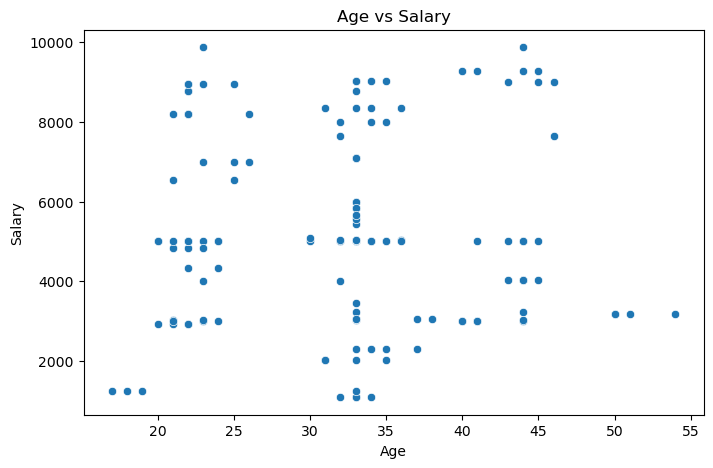

In [27]:
# Scatter plot for Age vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()

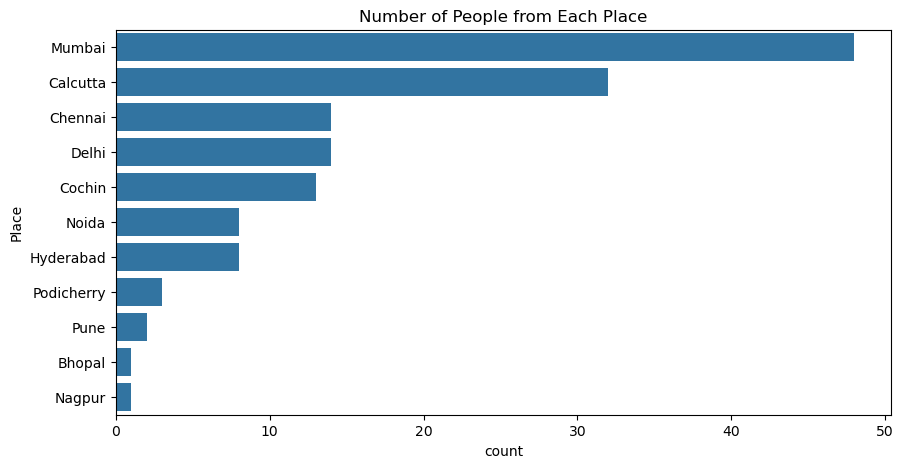

In [29]:
# Count plot for places
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Place'], order=df['Place'].value_counts().index)
plt.title("Number of People from Each Place")
plt.show()

In [31]:
# Step 4: Data Encoding
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [33]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Company', 'Place', 'Country'], drop_first=True)

In [35]:
# Step 5: Feature Scaling
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

In [37]:
minmax_scaler = MinMaxScaler()
df[['Age', 'Salary']] = minmax_scaler.fit_transform(df[['Age', 'Salary']])


In [39]:
# Save cleaned data
df.to_csv("cleaned_employee_dataset.csv", index=False)
print("Data preprocessing completed successfully.")


Data preprocessing completed successfully.
